# Heat equation

## libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML
from scipy import special

## initialization

In [456]:
COURANT = 0.4
LAMBDA = 0.5

X_max = 15
T_max = 30
X_min = T_min = 0
U_0 = 25
THETA = 0.8

NUMBER_X = 50
NUMBER_T = int(LAMBDA * (T_max - T_min) * NUMBER_X**2 / (X_max - X_min)**2 / COURANT)

In [457]:
X_RANGE = np.linspace(X_min, X_max, NUMBER_X)
T_RANGE = np.linspace(T_min, T_max, NUMBER_T)

X_STEP = X_RANGE[1] - X_RANGE[0]
T_STEP = T_RANGE[1] - T_RANGE[0]

In [458]:
X, T = np.meshgrid(X_RANGE, T_RANGE, indexing='ij')

# Boundary / initial conditions
U = np.zeros_like(X)
U[:, 0] = 0
U[0, :] = U_0
U[-1, :] = 0

U_EXACT = U.copy()

In [459]:
a = b = T_STEP * THETA * LAMBDA / (X_STEP**2)
c = 1 + 2 * a

alpha = np.zeros_like(X_RANGE)
beta = np.zeros_like(X_RANGE)

alpha[1] = 0
beta[1] = U_0

In [460]:
def calculate_coefficients(u):
    _a = T_STEP * (1 - THETA) * LAMBDA / (X_STEP**2)
    d = _a * np.roll(u, -1) + (1 - 2 * _a) * u + _a * np.roll(u, 1) 
    
    for i in range(1, len(u)-1):
        alpha[i+1] = b / (c - alpha[i] * a)
        beta[i+1] = (a * beta[i] + d[i]) / (c - alpha[i] * a)
        
    return alpha, beta

## main procedure

In [461]:
for j in tqdm_notebook(list(range(0, NUMBER_T-1))):
    current_u = U[:, j]
        
    alpha, beta = calculate_coefficients(current_u)
    
    for i in reversed(range(0, NUMBER_X-1)):
        U[i, j+1] = alpha[i+1] * U[i+1, j+1] + beta[i+1]

In [462]:
mask = np.zeros_like(T_RANGE).astype(bool)
mask[1:] = True
U_EXACT = U_0 * (1 - special.erf(X[:,mask] / (2 * np.sqrt(LAMBDA * T[:,mask]))))

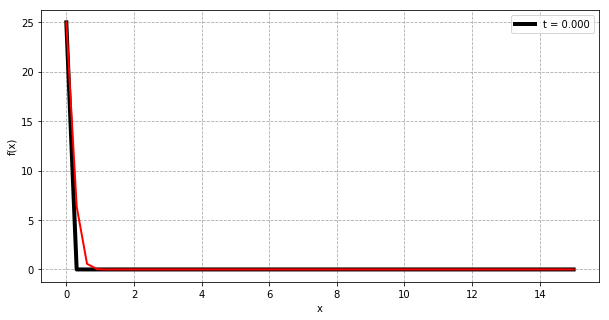

In [463]:
fig, ax = plt.subplots(figsize=(10, 5))

l1, = ax.plot(X_RANGE, U[:,-1], lw=4, color='black', label=None)
l2, = ax.plot(X_RANGE, U_EXACT[:,-1], lw=2, color='red', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(X_RANGE, U[:, i])
    l1.set_label('t = ' + '%.3f' %(i * T_STEP))
    l2.set_data(X_RANGE, U_EXACT[:, i])

    legend = plt.legend(loc='upper right')
    return l1, l2, legend

ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0, NUMBER_T - 2, 50).astype(int), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())

In [364]:
alpha

array([0.        , 1.        , 0.        , 0.19052531, 0.19770187,
       0.19798277, 0.19799378, 0.19799422, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423,
       0.19799423, 0.19799423, 0.19799423, 0.19799423, 0.19799423])